Nagaraj K
1RVU22BSC059

In [ ]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

import pandas as pd

import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

In [ ]:
((X_train, Y_train), (X_test, Y_test)) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
class_labels = pd.Series(['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Code', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot'])
labels_dict = class_labels.to_dict()
labels_dict

{0: 'T-shirt',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Code',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle Boot'}

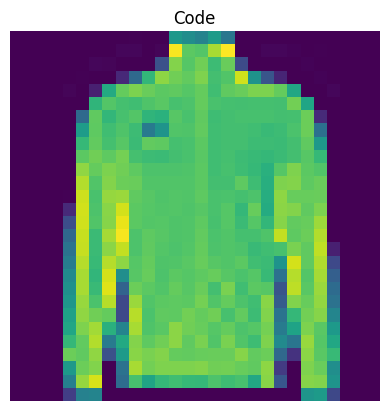

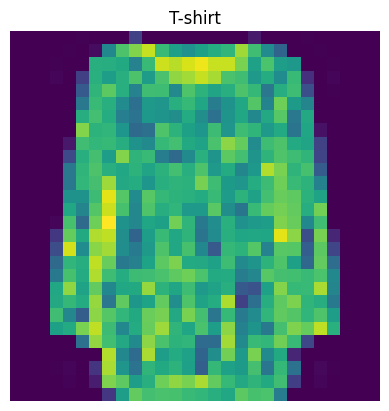

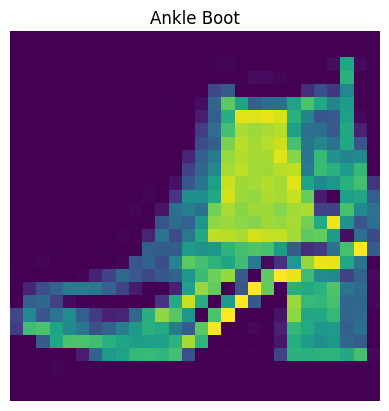

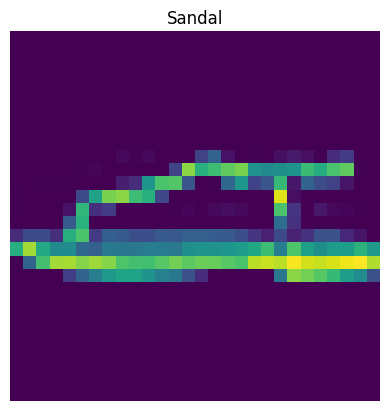

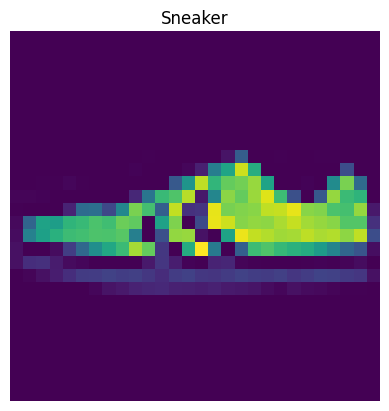

In [ ]:
np.random.seed(40)
for rand_num in np.random.randint(0, len(X_train), 5):
    plt.figure()
    plt.imshow(X_train[rand_num]), plt.axis('off')
    plt.title(labels_dict[Y_train[rand_num]])

In [ ]:
X_train_reshaped = X_train.reshape(len(X_train), -1)
X_test_reshaped = X_test.reshape(len(X_test), -1)

X_train_norm = X_train_reshaped/255
X_test_norm = X_test_reshaped/255

In [ ]:
n_features = X_train_norm.shape[1]
n_classes =  len(class_labels)

print('Number of input features (image pixels) : ', n_features)
print('Number of target classes (fashion categories) : ', n_classes)

Number of input features (image pixels) :  784
Number of target classes (fashion categories) :  10


In [ ]:
Y_train_onehot = to_categorical(Y_train, num_classes = n_classes)
Y_test_onehot = to_categorical(Y_test, num_classes = n_classes)

In [ ]:
X_train_final, X_valid, Y_train_final, Y_valid = train_test_split(X_train_norm, Y_train_onehot,
                                                                  test_size=0.16666)

print('Shape of data used for training, and shape of training targets : \n ', X_train.shape, ',', Y_train.shape)
print('Shape of data used for validation, and shape of validation targets: \n ', X_valid.shape, ',', Y_valid.shape)

Shape of data used for training, and shape of training targets : 
  (60000, 28, 28) , (60000,)
Shape of data used for validation, and shape of validation targets: 
  (10000, 784) , (10000, 10)


In [ ]:
model = Sequential()
model.add(Dense(1000, input_dim = n_features, activation='relu', use_bias=False))
model.add(Dense(1000, activation='relu', use_bias=False))
model.add(Dense(500, activation='relu', use_bias=False))
model.add(Dense(200, activation='relu', use_bias=False))
model.add(Dense(n_classes, activation='softmax', use_bias=False))
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1000)                │         784,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1000)                │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 500)                 │         500,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 200)                 │         100,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           2,000 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,386,000 (9.10 MB)

 Trainable params: 2,386,000 (9.10 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
save_at = "model.keras"
save_best = ModelCheckpoint (save_at, monitor='val_accuracy', verbose=0,
                             save_best_only=True, save_weights_only=False, mode='max')

Epoch 1/12
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 48s 19ms/step - accuracy: 0.7812 - loss: 0.6430 - val_accuracy: 0.8526 - val_loss: 0.4025
Epoch 2/12
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.8686 - loss: 0.3616 - val_accuracy: 0.8695 - val_loss: 0.3690
Epoch 3/12
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 84s 17ms/step - accuracy: 0.8861 - loss: 0.3088 - val_accuracy: 0.8813 - val_loss: 0.3295
Epoch 4/12
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.8941 - loss: 0.2817 - val_accuracy: 0.8740 - val_loss: 0.3507
Epoch 5/12
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9056 - loss: 0.2513 - val_accuracy: 0.8817 - val_loss: 0.3187
Epoch 6/12
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 39s 16ms/step - accuracy: 0.9134 - loss: 0.2327 - val_accuracy: 0.8967 - val_loss: 0.3019
Epoch 7/12
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 39s 16ms/step - accuracy: 0.9177 - loss: 0.2187 - val_accuracy: 0.8933 - val_loss: 0.3090
Epoch 8/12
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 38s 15ms/step - accuracy: 0.9245 -

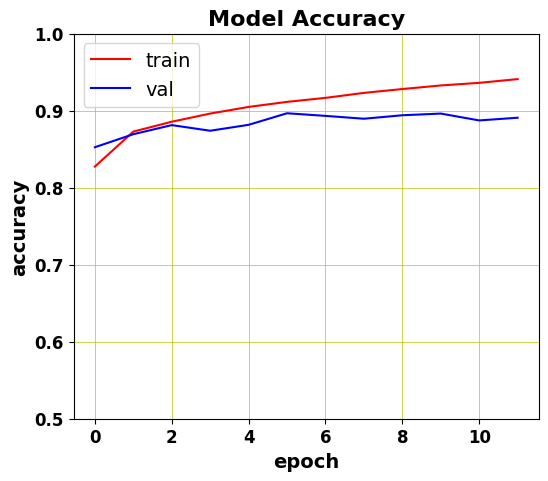

In [ ]:
history = model.fit( X_train_final, Y_train_final,
                    epochs = 12, batch_size = 20,
                    callbacks=[save_best], verbose=1,
                    validation_data = (X_valid, Y_valid) )

plt.figure(figsize=(6, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy', weight='bold', fontsize=16)
plt.ylabel('accuracy', weight='bold', fontsize=14)
plt.xlabel('epoch', weight='bold', fontsize=14)
plt.ylim(0.5, 1)
plt.xticks(weight='bold', fontsize=12)
plt.yticks(weight='bold', fontsize=12)
plt.legend(['train', 'val'], loc='upper left', prop={'size': 14})
plt.grid(color = 'y', linewidth='0.5')
plt.show()

In [ ]:
score = model.evaluate(X_test_norm, Y_test_onehot, verbose=0)
print('Accuracy over the test set: \n ', round((score[1]*100), 2), '%')

Accuracy over the test set: 
  88.35 %


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


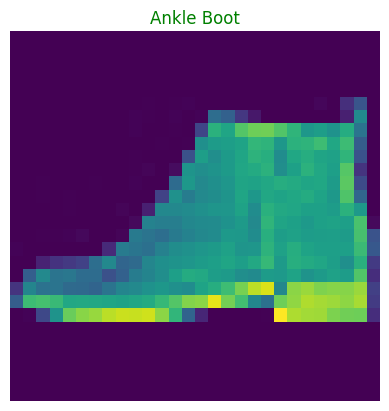

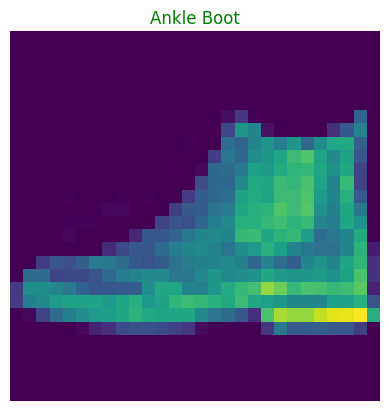

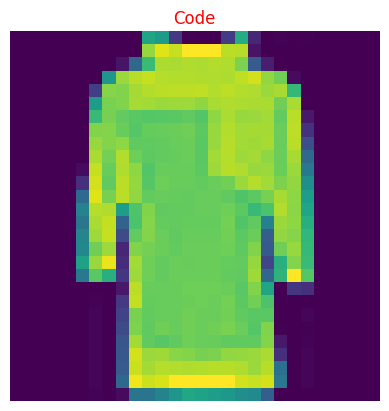

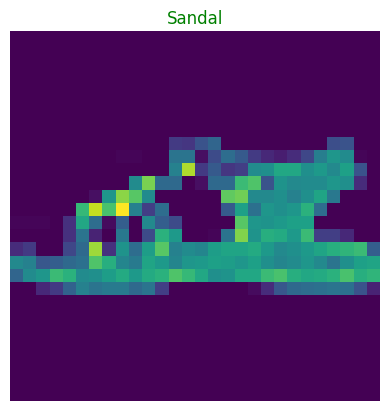

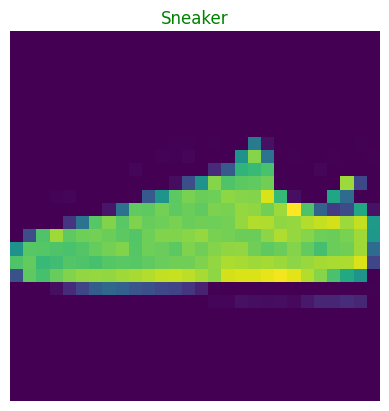

In [ ]:
Y_pred = np.round(model.predict(X_test_norm))

np.random.seed(50)
for rand_num in np.random.randint(0, len(Y_test_onehot), 5):
    plt.figure()
    plt.imshow(X_test[rand_num]), plt.axis('off')
    if np.where(Y_pred[rand_num] == 1)[0].sum() == np.where(Y_test_onehot[rand_num] == 1)[0].sum():
        plt.title(labels_dict[np.where(Y_pred[rand_num] == 1)[0].sum()], color='g')
    else :
        plt.title(labels_dict[np.where(Y_pred[rand_num] == 1)[0].sum()], color='r')

In [ ]:
trained_model = load_model("model.keras")

trained_model.layers

[<Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>]

In [ ]:
total_no_layers = len(trained_model.layers)
print(total_no_layers)

5


In [ ]:
#Pruning percentages

K = [0, 25, 50, 60, 70, 80, 90, 95, 97, 99]

In [ ]:
all_weights = {}

for layer_no in range(total_no_layers - 1):         #All except the final layer                                                                          #only the first four dense layers are to be pruned
    layer_weights = (pd.DataFrame(trained_model.layers[layer_no].get_weights()[0]).stack()).to_dict()
    layer_weights = { (layer_no, k[0], k[1]): v for k, v in layer_weights.items() }
    all_weights.update(layer_weights)

In [ ]:
all_weights_sorted = {k: v for k, v in sorted(all_weights.items(), key=lambda item: abs(item[1]))}

In [ ]:
total_no_weights = len(all_weights_sorted)
total_no_weights

2384000

In [ ]:
weight_pruning_scores = []

for pruning_percent in K:

    new_model = load_model("model.keras")
    new_weights = trained_model.get_weights().copy()

    prune_fraction = pruning_percent/100
    number_of_weights_to_be_pruned = int(prune_fraction*total_no_weights)
    weights_to_be_pruned = {k: all_weights_sorted[k] for k in list(all_weights_sorted)[ :  number_of_weights_to_be_pruned]}

    for k, v in weights_to_be_pruned.items():
        new_weights[k[0]][k[1], k[2]] = 0

    for layer_no in range(total_no_layers - 1) :
        new_layer_weights = new_weights[layer_no].reshape(1, new_weights[layer_no].shape[0], new_weights[layer_no].shape[1])
        new_model.layers[layer_no].set_weights(new_layer_weights)

    new_score  = new_model.evaluate(X_test_norm, Y_test_onehot, verbose=0)
    weight_pruning_scores .append(new_score[1])

In [ ]:
all_neurons = {}

for layer_no in range(total_no_layers - 1):

    layer_neurons = {}
    layer_neurons_df = pd.DataFrame(trained_model.layers[layer_no].get_weights()[0])

    for i in range(len(layer_neurons_df.columns)):
        layer_neurons.update({ i : np.array( layer_neurons_df.iloc[:,i] ) })

    layer_neurons = { (layer_no, k): v for k, v in layer_neurons.items() }
    all_neurons.update(layer_neurons)

In [ ]:
all_neurons_sorted = {k: v for k, v in sorted(all_neurons.items(), key=lambda item: np.linalg.norm(item[1], ord=2, axis=0))}

In [ ]:
total_no_neurons = len(all_neurons_sorted)
total_no_neurons

2700

In [ ]:
neuron_pruning_scores = []

for pruning_percent in K:

    new_model = load_model("model.keras")
    new_weights = trained_model.get_weights().copy()

    prune_fraction = pruning_percent/100
    number_of_neurons_to_be_pruned = int(prune_fraction*total_no_neurons)
    neurons_to_be_pruned = {k: all_neurons_sorted[k] for k in list(all_neurons_sorted)[ : number_of_neurons_to_be_pruned]}

    for k, v in neurons_to_be_pruned.items():
        new_weights[k[0]][:, k[1]] = 0

    for layer_no in range(total_no_layers - 1) :
        new_layer_weights = new_weights[layer_no].reshape(1, new_weights[layer_no].shape[0], new_weights[layer_no].shape[1])
        new_model.layers[layer_no].set_weights(new_layer_weights)

    new_score  = new_model.evaluate(X_test_norm, Y_test_onehot, verbose=0)
    neuron_pruning_scores.append(new_score[1])

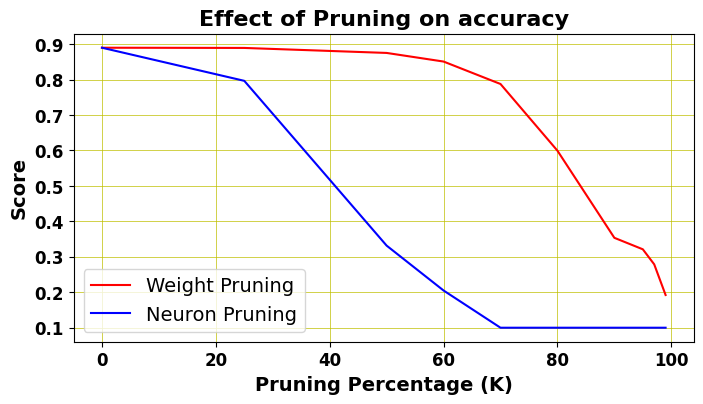

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(pd.DataFrame(weight_pruning_scores).set_index(pd.Series(K), drop=True) , color='r')
plt.plot(pd.DataFrame(neuron_pruning_scores).set_index(pd.Series(K), drop=True) , color='b')
plt.title('Effect of Pruning on accuracy', weight='bold', fontsize=16)
plt.ylabel('Score', weight='bold', fontsize=14)
plt.xlabel('Pruning Percentage (K)', weight='bold', fontsize=14)
plt.xticks(weight='bold', fontsize=12)
plt.yticks(weight='bold', fontsize=12)
plt.legend(['Weight Pruning', 'Neuron Pruning'], loc='best', prop={'size': 14})
plt.grid(color = 'y', linewidth='0.5')
plt.show()